<a href="https://colab.research.google.com/github/iamZamil/Brain-Tumor-Classfication/blob/main/Headstarter_Accelerator_AI_Project2_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:01<00:00, 115MB/s]
100% 149M/149M [00:01<00:00, 115MB/s]


In [ ]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a dataframe with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Classes': classes
    })

    return df



In [ ]:
tr_df=get_class_paths("/content/Training")

In [ ]:
tr_df

Class Path    Classes
0       /content/Training/notumor/Tr-no_0440.jpg    notumor
1       /content/Training/notumor/Tr-no_0722.jpg    notumor
2       /content/Training/notumor/Tr-no_1478.jpg    notumor
3       /content/Training/notumor/Tr-no_1053.jpg    notumor
4       /content/Training/notumor/Tr-no_1509.jpg    notumor
...                                          ...        ...
5707  /content/Training/pituitary/Tr-pi_0647.jpg  pituitary
5708  /content/Training/pituitary/Tr-pi_0321.jpg  pituitary
5709  /content/Training/pituitary/Tr-pi_1066.jpg  pituitary
5710  /content/Training/pituitary/Tr-pi_0753.jpg  pituitary
5711  /content/Training/pituitary/Tr-pi_0731.jpg  pituitary

[5712 rows x 2 columns]

In [ ]:
ts_df=get_class_paths("/content/Testing")

In [ ]:
ts_df

Class Path    Classes
0       /content/Testing/notumor/Te-no_0112.jpg    notumor
1       /content/Testing/notumor/Te-no_0118.jpg    notumor
2       /content/Testing/notumor/Te-no_0307.jpg    notumor
3       /content/Testing/notumor/Te-no_0145.jpg    notumor
4       /content/Testing/notumor/Te-no_0234.jpg    notumor
...                                         ...        ...
1306  /content/Testing/pituitary/Te-pi_0144.jpg  pituitary
1307  /content/Testing/pituitary/Te-pi_0161.jpg  pituitary
1308  /content/Testing/pituitary/Te-pi_0284.jpg  pituitary
1309  /content/Testing/pituitary/Te-pi_0040.jpg  pituitary
1310  /content/Testing/pituitary/Te-pi_0118.jpg  pituitary

[1311 rows x 2 columns]

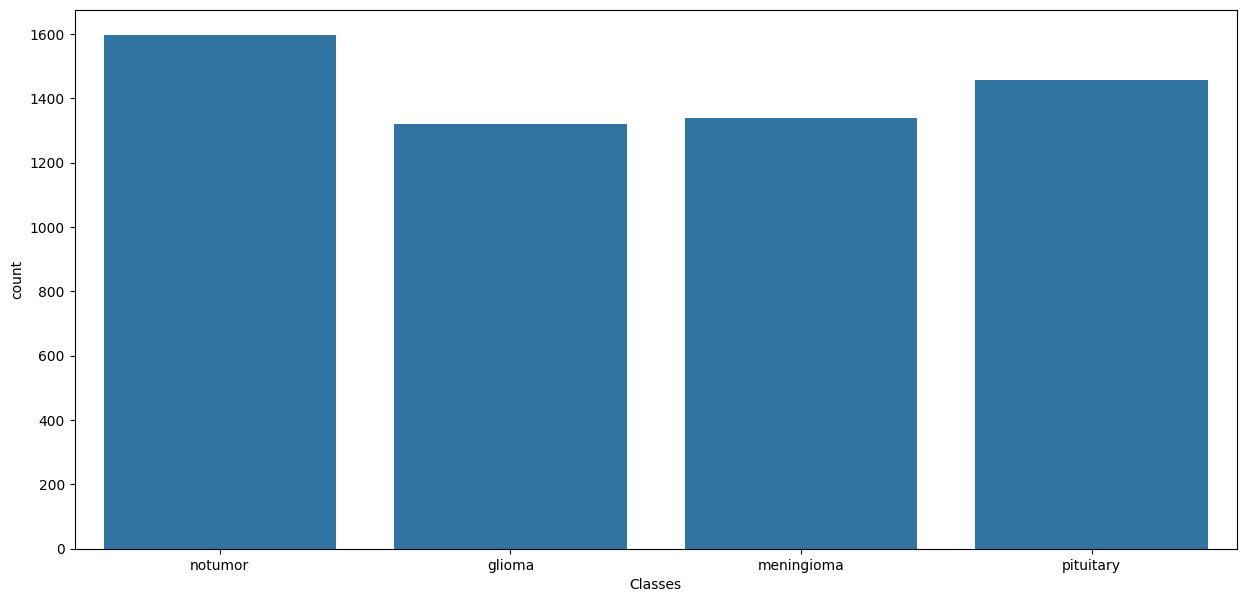

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=tr_df , x=tr_df['Classes'])

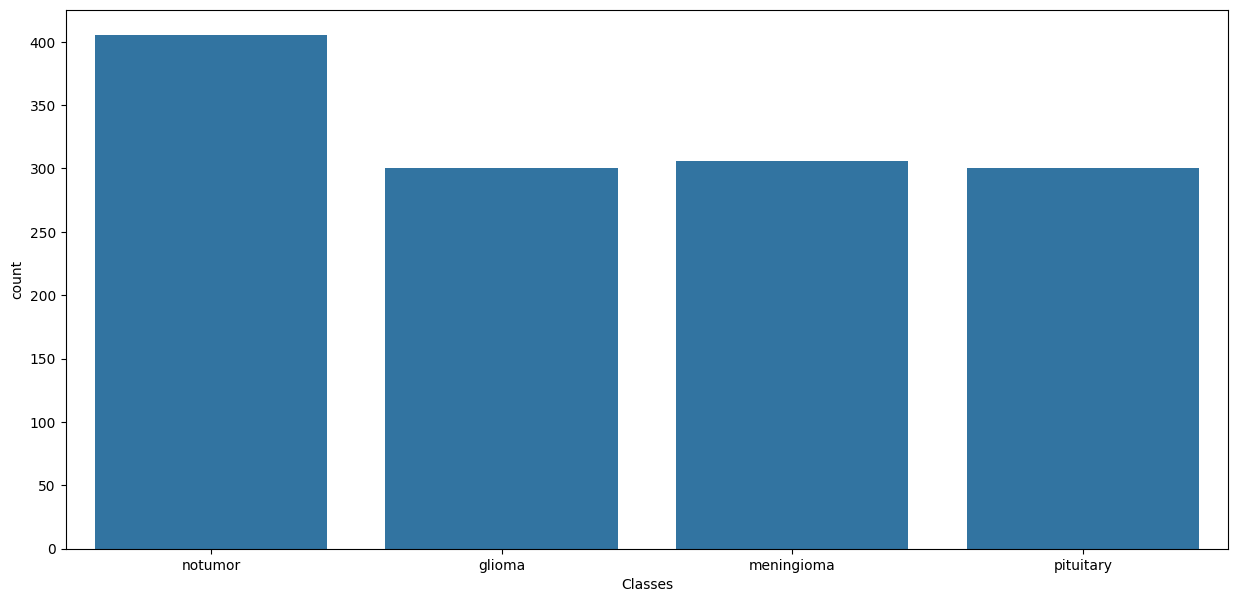

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=ts_df , x=ts_df['Classes'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df , ts_df =train_test_split(ts_df , train_size=0.5 , stratify=ts_df['Classes'])

In [ ]:
valid_df


Class Path     Classes
433       /content/Testing/glioma/Te-gl_0160.jpg      glioma
388    /content/Testing/notumor/Te-noTr_0003.jpg     notumor
341      /content/Testing/notumor/Te-no_0352.jpg     notumor
971   /content/Testing/meningioma/Te-me_0259.jpg  meningioma
190      /content/Testing/notumor/Te-no_0342.jpg     notumor
...                                          ...         ...
520       /content/Testing/glioma/Te-gl_0232.jpg      glioma
1294   /content/Testing/pituitary/Te-pi_0147.jpg   pituitary
402      /content/Testing/notumor/Te-no_0232.jpg     notumor
592       /content/Testing/glioma/Te-gl_0032.jpg      glioma
1268   /content/Testing/pituitary/Te-pi_0155.jpg   pituitary

[655 rows x 2 columns]

In [ ]:
ts_df


Class Path     Classes
770   /content/Testing/meningioma/Te-me_0248.jpg  meningioma
757   /content/Testing/meningioma/Te-me_0249.jpg  meningioma
1238   /content/Testing/pituitary/Te-pi_0252.jpg   pituitary
863   /content/Testing/meningioma/Te-me_0210.jpg  meningioma
278      /content/Testing/notumor/Te-no_0068.jpg     notumor
...                                          ...         ...
1229   /content/Testing/pituitary/Te-pi_0084.jpg   pituitary
1151   /content/Testing/pituitary/Te-pi_0119.jpg   pituitary
171      /content/Testing/notumor/Te-no_0310.jpg     notumor
662       /content/Testing/glioma/Te-gl_0069.jpg      glioma
649       /content/Testing/glioma/Te-gl_0158.jpg      glioma

[656 rows x 2 columns]

In [ ]:
batch_size=32

image_size=(299,299)

image_generator=ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))

ts_gen=ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df, x_col='Class Path',
    y_col='Classes',
    batch_size=batch_size,
    target_size=image_size
)

# for training dataset reszing
# tr_gen = ImageDataGenerator.flow_from_dataframe(
#     tr_df , x_col ='Class Path',
#     y_col = 'Classes' ,
#     batch_size=batch_size,
#     target_size=image_size
# )
# for validaion datset resizing
valid_gen = image_generator.flow_from_dataframe(
   valid_df, x_col='Class Path',
    y_col='Classes',
    batch_size=batch_size,
    target_size=image_size
)
# for testing dataset Resizing


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator object
ts_gen = ImageDataGenerator(rescale=1/255)

# Use flow_from_dataframe method to create the generator
ts_data = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Classes',
    batch_size=16,
    target_size=image_size,  # Replace 'image_size' with the desired dimensions, e.g., (224, 224)
    shuffle=False,
    class_mode='categorical'  # or 'binary' depending on your output labels
)


Found 656 validated image filenames belonging to 4 classes.


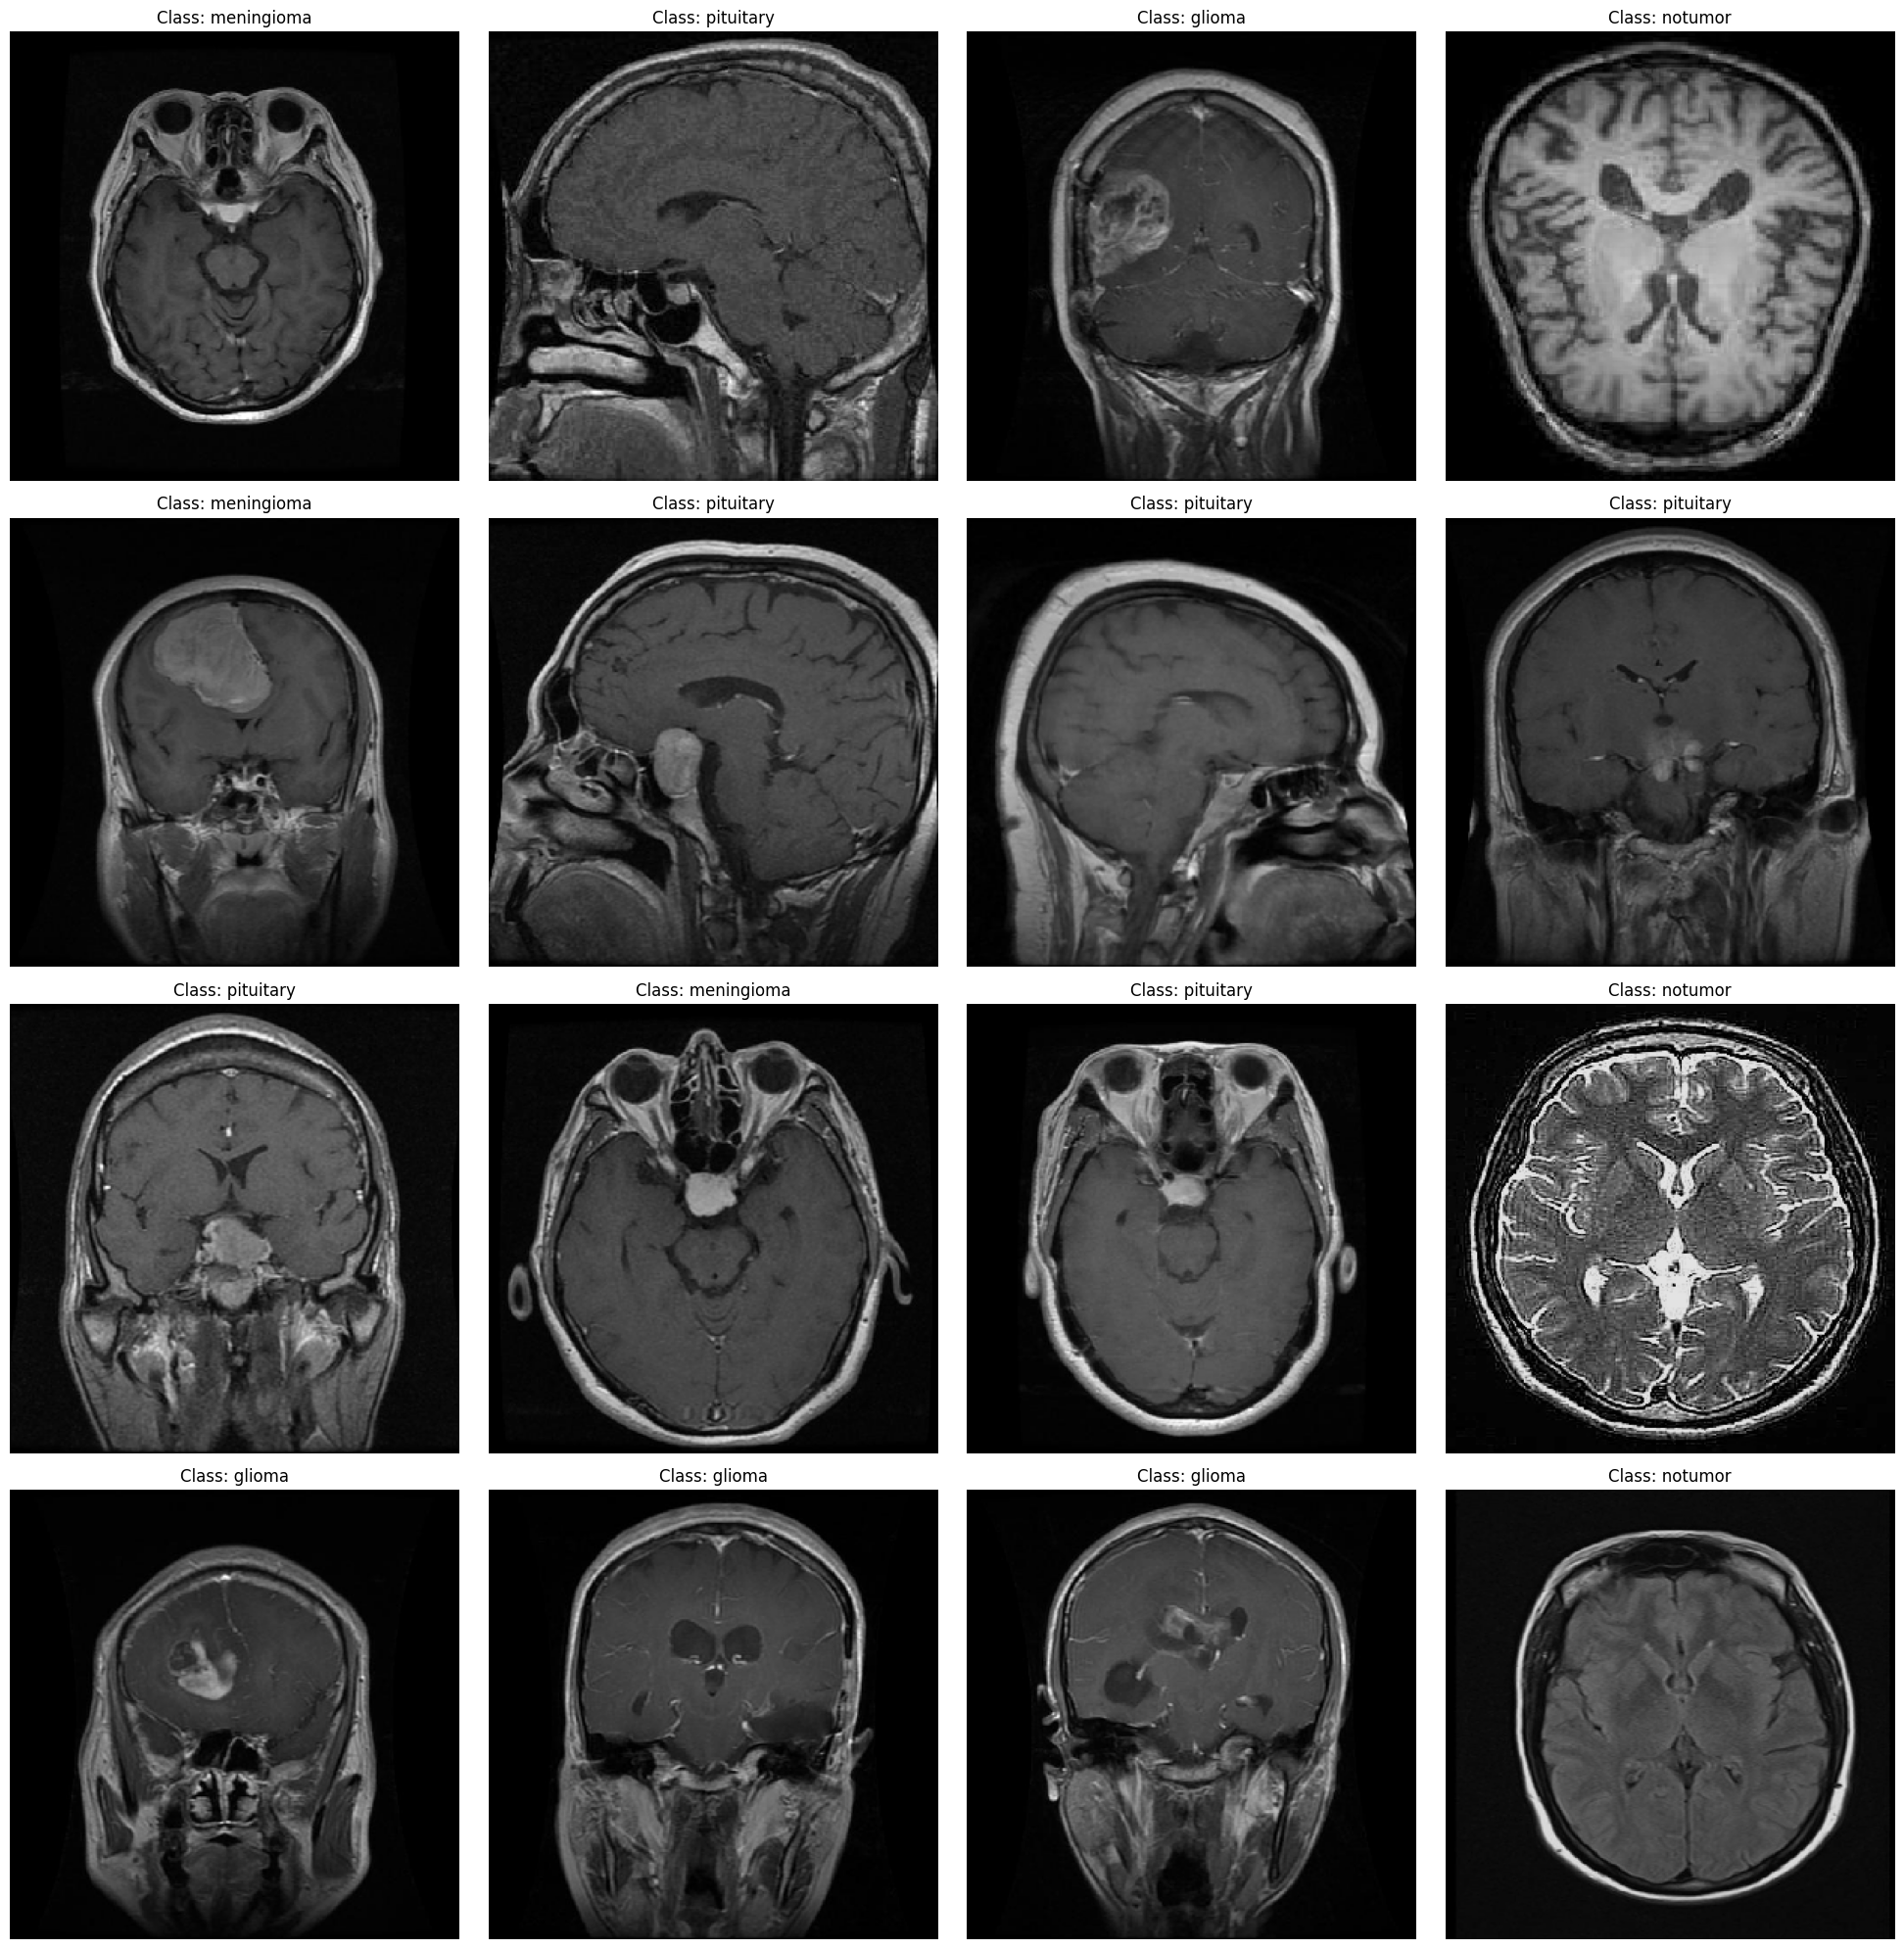

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
    plt.tight_layout()
plt.show()

In [ ]:
# img_shape = (299, 299, 3)

# base_model = tf.keras.applications.Xception(include_top=False,
#                                           weights="imagenet",
#                                           input_shape=img_shape,
#                                           pooling='max')

# model = Sequential([
#     base_model,
#     Flatten(),
#     Dropout(rate=0.3),
#     Dense(128, activation='relu'),
#     Dropout(rate=0.25),
#     Dense(4, activation='softmax')
# ])
import tensorflow as tf

img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling="max")

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       Precision(),
                       Recall()])


In [ ]:
hist = model.fit(tr_gen,epochs=5,validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7341 - loss: 0.7454 - precision: 0.8308 - recall: 0.6164 - val_accuracy: 0.9252 - val_loss: 0.1881 - val_precision: 0.9264 - val_recall: 0.9221
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 856ms/step - accuracy: 0.9790 - loss: 0.0690 - precision: 0.9812 - recall: 0.9759 - val_accuracy: 0.8824 - val_loss: 0.3893 - val_precision: 0.8904 - val_recall: 0.8809
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 198s 834ms/step - accuracy: 0.9904 - loss: 0.0281 - precision: 0.9905 - recall: 0.9898 - val_accuracy: 0.9359 - val_loss: 0.1823 - val_precision: 0.9401 - val_recall: 0.9344
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 855ms/step - accuracy: 0.9956 - loss: 0.0202 - precision: 0.9957 - recall: 0.9955 - val_accuracy: 0.9420 - val_loss: 0.2706 - val_precision: 0.9420 - val_recall: 0.9420
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 200s 847ms/step - accuracy: 0.9932 - loss: 0.0235 - precision: 0.9937 - recall: 0.9931 - val_accuracy: 0.9802 - val_loss: 

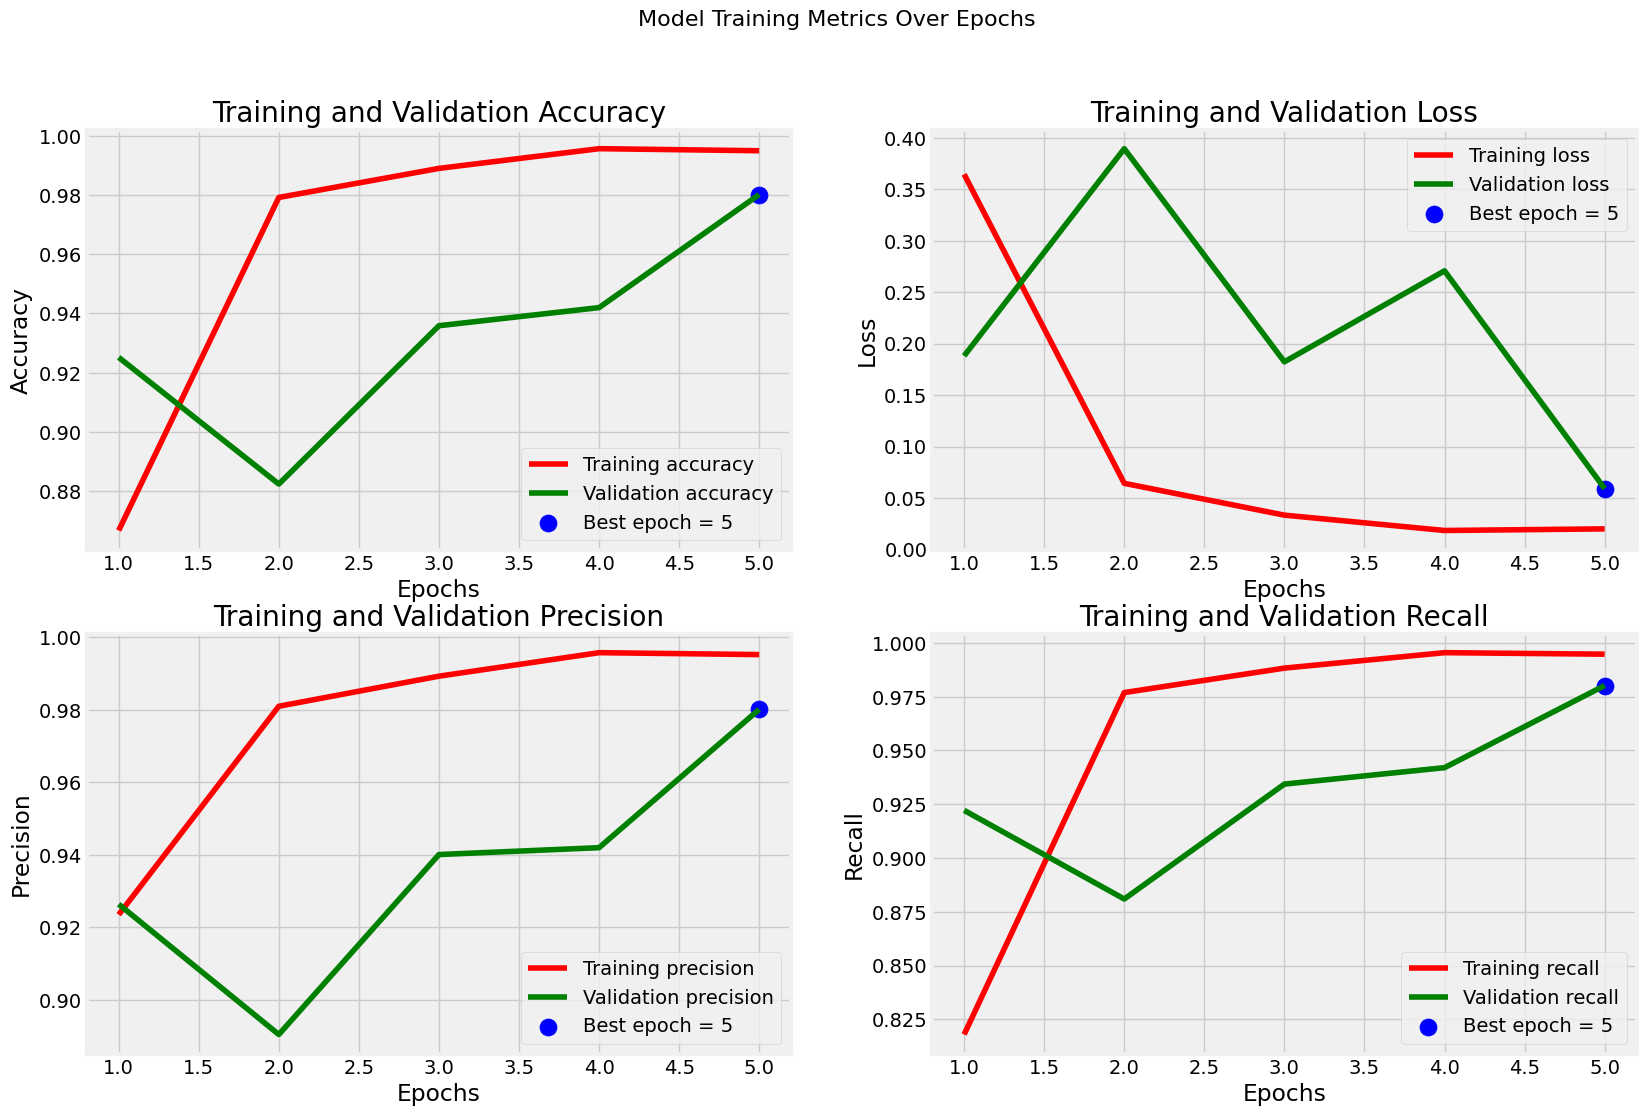

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_data, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")

print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")

print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.9952 - loss: 0.0169 - precision: 0.9952 - recall: 0.9952
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9804 - loss: 0.0557 - precision: 0.9804 - recall: 0.9804
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 1.0000 - loss: 0.0039 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9941 - loss: 0.0121 - precision: 0.9941 - recall: 0.9941
Train Accuracy: 99.61%
Train Loss: 0.0139

Validation Accuracy: 98.17%
Validation Loss: 0.0490

Test Accuracy: 99.39%
Test Loss: 0.0130


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step


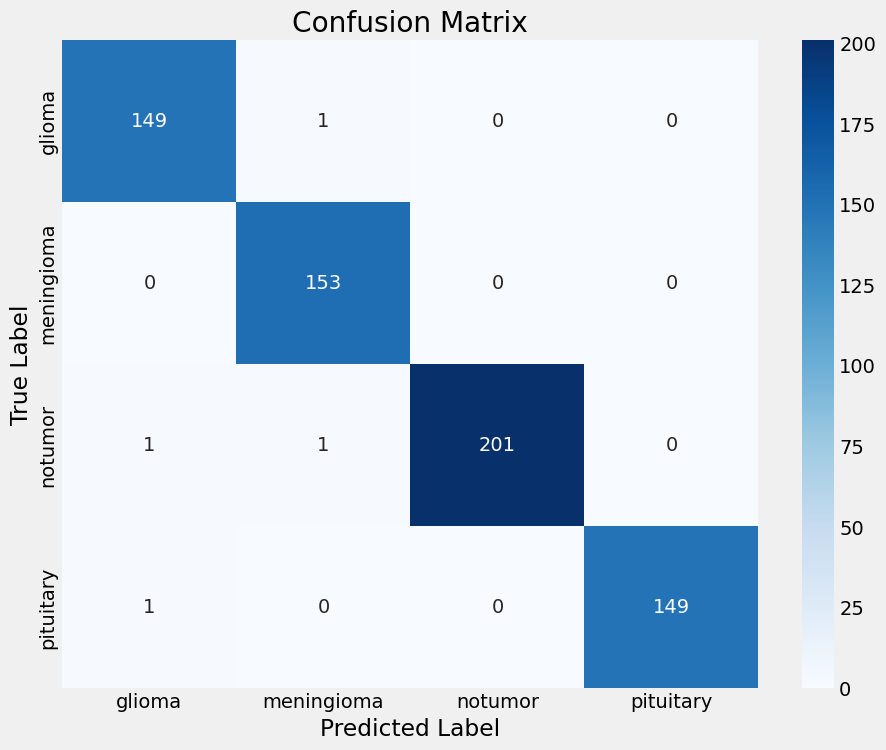

In [ ]:
# Get the true labels from the generator
y_true = ts_data.classes

# Get model predictions
y_pred = model.predict(ts_data, batch_size=16)  # Adjust the batch_size if necessary

# If you're working with a classification problem, make sure the predictions are integers
y_pred = np.argmax(y_pred, axis=1)  # This step depends on your model's output shape (e.g., softmax output)

# Create and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(ts_data.class_indices.keys())  # Use the class indices from the generator

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step


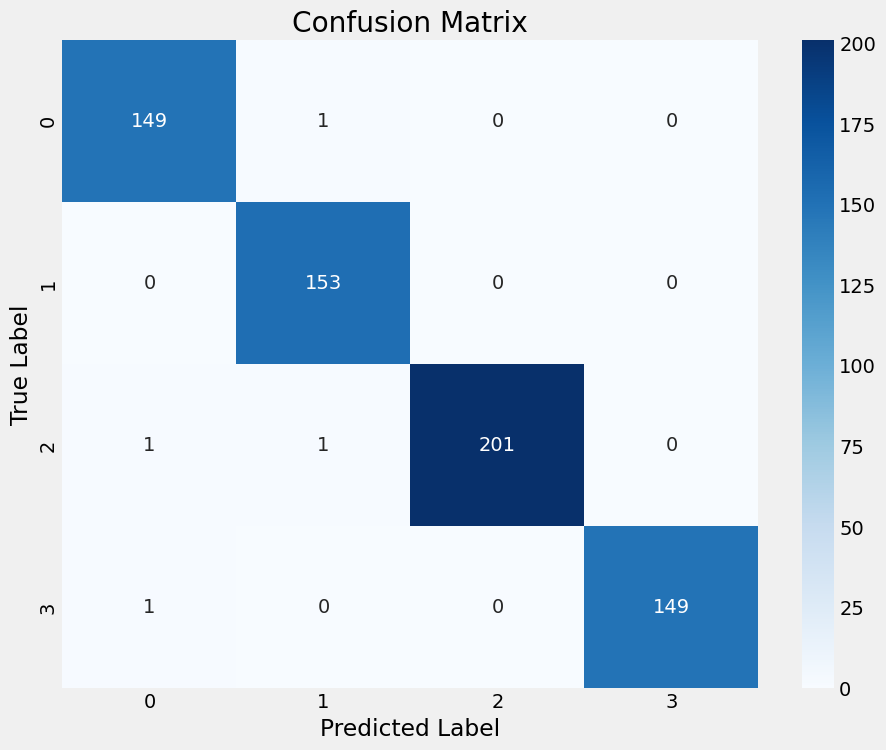

In [ ]:
preds = model.predict(ts_data)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_data.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.bar(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


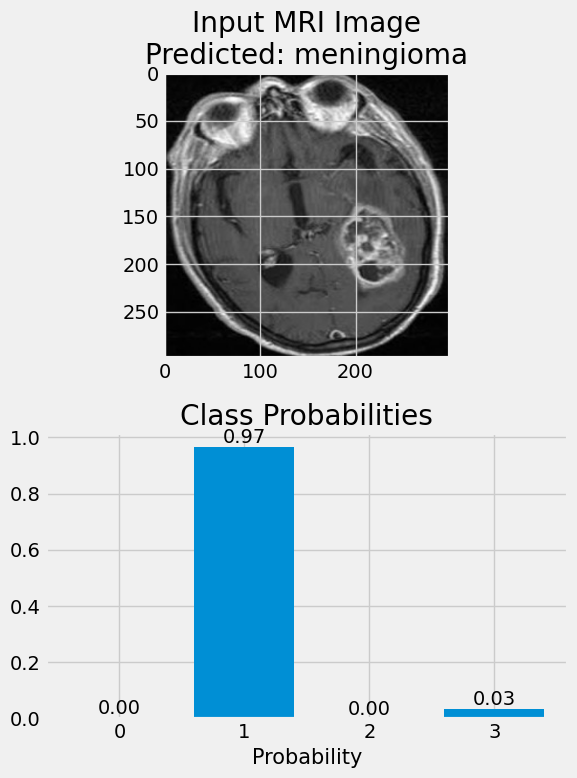


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


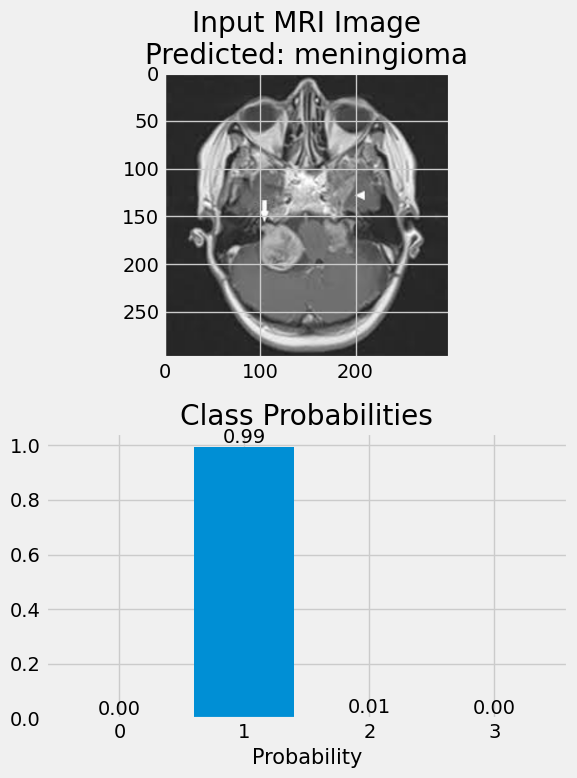


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0002.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


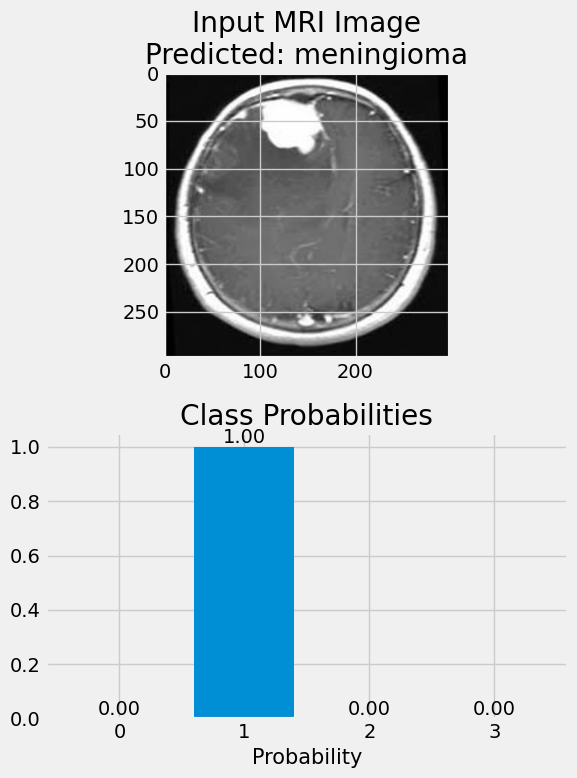


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0008.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


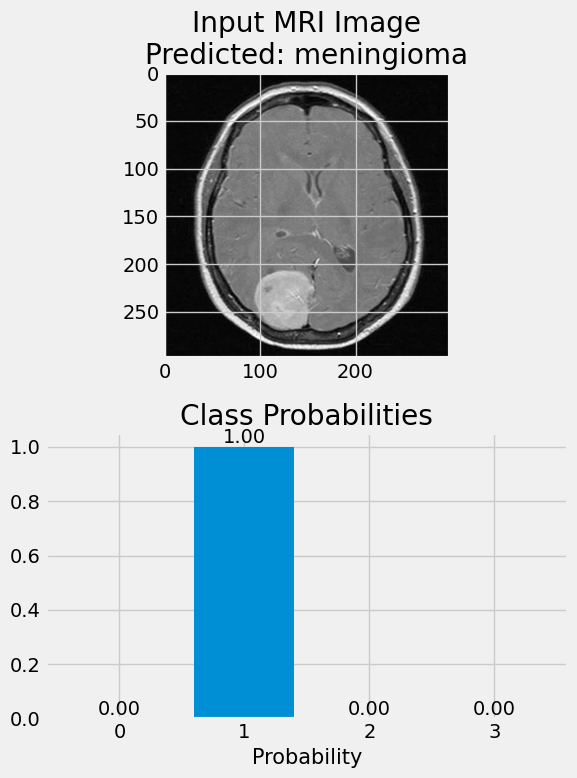


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-me_0010.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


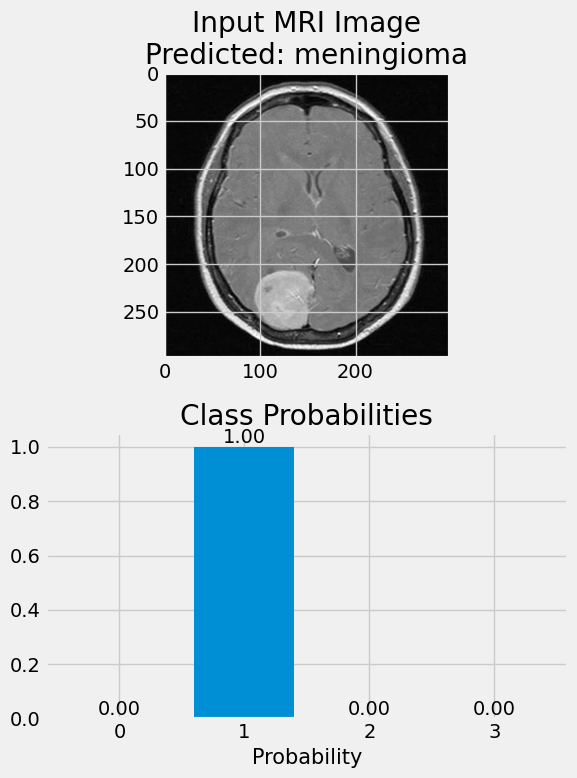


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-me_0010.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


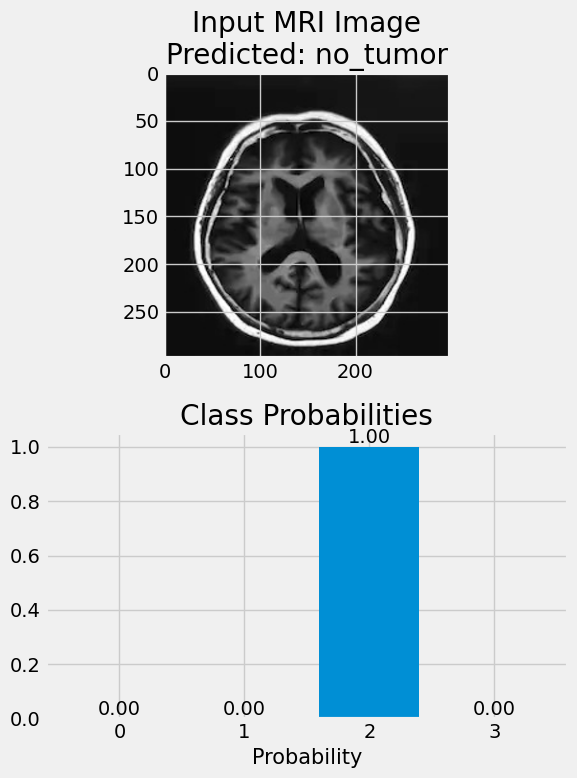


Predicted tumor type: no_tumor


In [ ]:
predict("/content/Testing/notumor/Te-noTr_0003.jpg")

In [ ]:
predict("/content/Testing/glioma/Te-noTr_0000.jpg")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Testing/glioma/Te-noTr_0000.jpg'

<Figure size 600x800 with 0 Axes>

In [ ]:
predict("/content/Testing/glioma/Te-gl_0044.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")